In [1]:
#imports library
import pandas as pd 
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from pandas.plotting import autocorrelation_plot
from random import randrange
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas import datetime
import numpy as np
from pandas import read_json
from pandas import read_csv
from pandas import DataFrame
from pandas import Grouper
from numpy import array
import matplotlib.colors as colors
import matplotlib.cm as cm
from pylab import rcParams
import warnings
import itertools
from pandas import Series
plt.style.use('fivethirtyeight')
from dateutil.relativedelta import relativedelta 
from scipy.optimize import minimize
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA

import statsmodels.formula.api as smf            
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                    
from tqdm import tqdm_notebook

import warnings                                  
warnings.filterwarnings('ignore')

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

from math import sqrt


from dateutil.parser import parse
%matplotlib inline

# Naive Hypothesis

# Develop a Test Harness - Define a Validation Dataset & Developing a Method for Model Evaluation

In [2]:
# Split the data into a training and testing dataset
Series = read_csv('dfEq1MdM_YMC.csv', header=0, index_col=0, parse_dates = True, squeeze = True )
split_point = len(Series) - 18
dataset1, validation1 = Series.estimatedqty[0:split_point], Series.estimatedqty[split_point:]
dataset2, validation2 = Series.spillno[0:split_point], Series.spillno[split_point:]
print('dataset1 %d, validation1%d' % (len(dataset1), len(validation1)))
print('dataset2 %d, validation2%d' % (len(dataset2), len(validation2)))
dataset1.to_csv('dataset1.csv', header= False)
validation1.to_csv('validation1.csv', header= False)
dataset2.to_csv('dataset2.csv', header= False)
validation2.to_csv('validation2.csv', header= False)

dataset1 168, validation118
dataset2 168, validation218


In [3]:
# load data
series = read_csv('dataset1.csv', header=None, index_col=0, parse_dates=True, squeeze=True)

# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    yhat = history[-1]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' %(yhat, obs))
    # report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' %rmse)

>Predicted=44853.043, Expected=1323.756
>Predicted=1323.756, Expected=6001.042
>Predicted=6001.042, Expected=3612.575
>Predicted=3612.575, Expected=2325.903
>Predicted=2325.903, Expected=3263.790
>Predicted=3263.790, Expected=3939.546
>Predicted=3939.546, Expected=3012.948
>Predicted=3012.948, Expected=2844.384
>Predicted=2844.384, Expected=1410.015
>Predicted=1410.015, Expected=1931.603
>Predicted=1931.603, Expected=8402.434
>Predicted=8402.434, Expected=2300.101
>Predicted=2300.101, Expected=817.390
>Predicted=817.390, Expected=1412.274
>Predicted=1412.274, Expected=2526.851
>Predicted=2526.851, Expected=1802.429
>Predicted=1802.429, Expected=2330.042
>Predicted=2330.042, Expected=5851.661
>Predicted=5851.661, Expected=2638.374
>Predicted=2638.374, Expected=3051.184
>Predicted=3051.184, Expected=3019.560
>Predicted=3019.560, Expected=3194.604
>Predicted=3194.604, Expected=3011.579
>Predicted=3011.579, Expected=1813.534
>Predicted=1813.534, Expected=2157.693
>Predicted=2157.693, Expec

In [4]:
#ESTIMATED QUANTITY

# load data
series2 = read_csv('dataset2.csv', header=None, index_col=0, parse_dates=True, squeeze=True)

# prepare data
X2 = series.values
X2 = X2.astype('float32')
train_size = int(len(X2) * 0.50)
train2, test2 = X2[0:train_size], X2[train_size:]

# walk-forward validation
history2 = [x for x in train]
predictions2 = list()
for i in range(len(test)):
    # predict
    yhat2 = history2[-1]
    predictions2.append(yhat2)
    # observation
    obs2 = test2[i]
    history2.append(obs2)
    print('>Predicted=%.3f, Expected=%.3f' %(yhat2, obs2))
    # report performance
rmse = sqrt(mean_squared_error(test2, predictions2))
print('RMSE: %.3f' %rmse)

>Predicted=44853.043, Expected=1323.756
>Predicted=1323.756, Expected=6001.042
>Predicted=6001.042, Expected=3612.575
>Predicted=3612.575, Expected=2325.903
>Predicted=2325.903, Expected=3263.790
>Predicted=3263.790, Expected=3939.546
>Predicted=3939.546, Expected=3012.948
>Predicted=3012.948, Expected=2844.384
>Predicted=2844.384, Expected=1410.015
>Predicted=1410.015, Expected=1931.603
>Predicted=1931.603, Expected=8402.434
>Predicted=8402.434, Expected=2300.101
>Predicted=2300.101, Expected=817.390
>Predicted=817.390, Expected=1412.274
>Predicted=1412.274, Expected=2526.851
>Predicted=2526.851, Expected=1802.429
>Predicted=1802.429, Expected=2330.042
>Predicted=2330.042, Expected=5851.661
>Predicted=5851.661, Expected=2638.374
>Predicted=2638.374, Expected=3051.184
>Predicted=3051.184, Expected=3019.560
>Predicted=3019.560, Expected=3194.604
>Predicted=3194.604, Expected=3011.579
>Predicted=3011.579, Expected=1813.534
>Predicted=1813.534, Expected=2157.693
>Predicted=2157.693, Expec

In [5]:
series1 = read_csv('dataset1.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
series2 = read_csv('dataset2.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
print(series1.describe())


count      168.000000
mean      3951.987403
std       6639.447346
min          0.030000
25%       1237.680845
50%       2312.677950
75%       3669.107950
max      57005.363900
Name: 1, dtype: float64


In [6]:
print(series2.describe())

count    168.000000
mean      71.398810
std       35.801706
min        1.000000
25%       50.250000
50%       68.500000
75%       90.000000
max      186.000000
Name: 1, dtype: float64


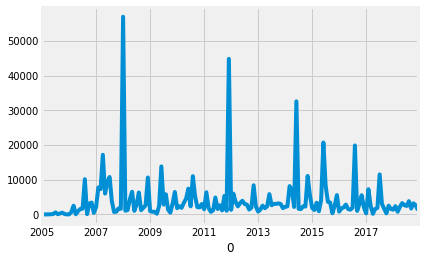

In [7]:
series1.plot()
plt.show()


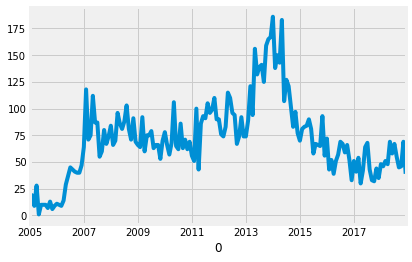

In [8]:
series2.plot()
plt.show()


<function matplotlib.pyplot.show(*args, **kw)>

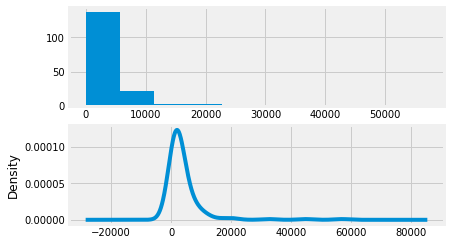

In [9]:
plt.figure(1)
plt.subplot(211)
series1.hist()
plt.subplot(212)
series1.plot(kind='kde')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

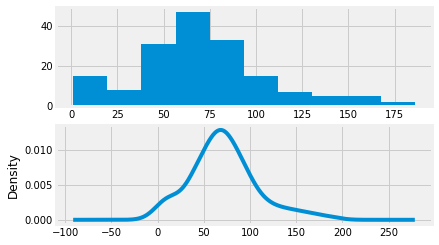

In [10]:
plt.figure(1)
plt.subplot(211)
series2.hist()
plt.subplot(212)
series2.plot(kind='kde')
plt.show

The distributions are not Gaussians. The bell curve for estimatedqty is long tailed to the left and the spillno is left shifted. This may suggest an exponential or a double Gaussian and we may see some benefit in exploring some power transforms of the data before modeling.

0
2005-01-31     100.057000
2005-02-28       0.030000
2005-03-31       3.060000
2005-04-30      24.014200
2005-05-31      50.000000
                 ...     
2018-08-31    3826.540419
2018-09-30    1702.437938
2018-10-31    3195.143897
2018-11-30    2662.695108
2018-12-31    1198.564149
Name: 1, Length: 168, dtype: float64


<function matplotlib.pyplot.show(*args, **kw)>

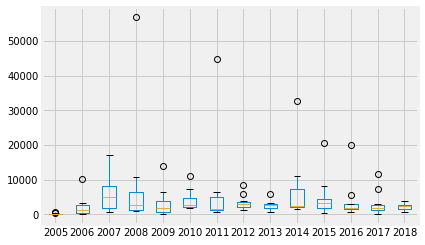

In [11]:
print (series1)
#new_re_df = [s.iloc[np.where(ts.astype(int) == int(i))] for i in ts]
groups = series1['2005':'2018'].groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
    years[name.year]= group.values
years.boxplot()
plt.show

0
2005-01-31    16
2005-02-28    19
2005-03-31     9
2005-04-30    28
2005-05-31     1
              ..
2018-08-31    55
2018-09-30    45
2018-10-31    46
2018-11-30    69
2018-12-31    39
Name: 1, Length: 168, dtype: int64


<function matplotlib.pyplot.show(*args, **kw)>

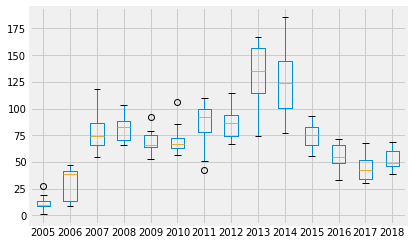

In [12]:
print (series2)
#new_re_df = [s.iloc[np.where(ts.astype(int) == int(i))] for i in ts]
groups = series2['2005':'2018'].groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
    years[name.year]= group.values
years.boxplot()
plt.show

Fluctuations may not be systematic and hard to model

Developing a manually configured ARIMA(p, d, q) requires a stationary time series. We will create a stationary series by differencing

In [13]:
# create a differenced time series
from pandas import Series
def difference(dataset):
    diff = list()
    for i in range (1, len(dataset)):
        value = dataset[i] - dataset[i -1]
        diff.append(value)
    return Series(diff)

series = read_csv('dataset1.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
X = series.values

# difference data
stationary = difference(X)
stationary.index = series1.index[1:]

#Check if stationary
result = adfuller(stationary)
print ('ADF Statistic: %f' % result[0])
print ('p-value: %f' %result[1])
print ('Critical Values:')
for key, value in result[4].items():
       print('\t%s: %.3f' %(key, value))
#save
stationary.to_csv('stationary.csv', header=False)

ADF Statistic: -7.329128
p-value: 0.000000
Critical Values:
	1%: -3.473
	5%: -2.880
	10%: -2.577


In [14]:
# create a differenced time series
def difference(dataset):
    diff = list()
    for i in range (1, len(dataset)):
        value = dataset[i] - dataset[i - 1]
        diff.append(value)
    return Series(diff)
X = series2.values

# difference data
stationary1 = difference(X)
stationary.index = series2.index[1:]

#Check if stationary
result = adfuller(stationary1)
print ('ADF Statistic: %f' % result[0])
print ('p-value: %f' %result[1])
print ('Critical Values:')
for key, value in result[4].items():
       print('\t%s: %.3f' %(key, value))
#save
stationary1.to_csv('stationary1.csv', header=False)

ADF Statistic: -13.405184
p-value: 0.000000
Critical Values:
	1%: -3.471
	5%: -2.879
	10%: -2.576


    The Augumented Dickey-Fuller test results for 2 series shows that their test statistic values are smaller than the critical value at 5%. This suggests that we can reject the null hypothesis with a significance level of less than 5%. This means that the process has no unit root, and in turn that the 1-lag differenced time series is stationary or does not have time dependent structure. This suggests that at least one level of differencing is required. The d parameter in our ARIMA model should at least be a value of 1.

In [15]:
# ACF and PACF plots of the time series to give the p (AR) and q(MA) parameters

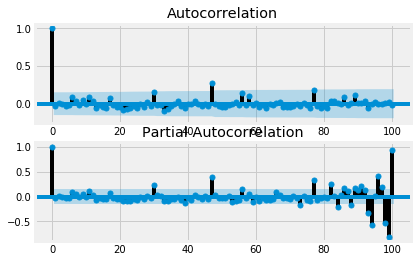

In [16]:
plt.figure()
plt.subplot(211)
plot_acf(series1, lags=100, ax=plt.gca())
plt.subplot(212)
plot_pacf(series1, lags=100, ax=plt.gca())
plt.show()

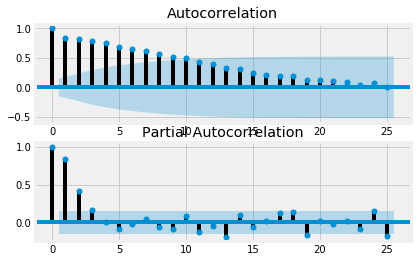

In [17]:
plt.figure()
plt.subplot(211)
plot_acf(series2, lags=25, ax=plt.gca())
plt.subplot(212)
plot_pacf(series2, lags=25, ax=plt.gca())
plt.show()

Appears difficult to interpret. So will use Grid Search ARIMA Hyperparameters p: 0 to 12, d: 0 to 3, q: 0 to 12

In [ ]:
#evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
    for t in range (len(test)):
        model = ARIMA(history, order = arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(test[t])
    #Calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print ('ARIMA%s RMSE =%.3f'%(order, rmse))
                except:
                    continue
            print('Best ARIMA%s RMSE=%.3f' %(best_cfg, best_score))
            
#load dataset
series1 = read_csv('dataset1.csv', header=None, index_col=0, parse_dates=True, squeeze=True)

#evaluate parameters
p_values = range(0, 13)
d_values = range(0, 4)
q_values = range(0, 13)

warnings.filterwarnings("ignore")
evaluate_models(series1.values, p_values, d_values, q_values)

Best ARIMANone RMSE=inf
Best ARIMANone RMSE=inf
Best ARIMANone RMSE=inf
Best ARIMANone RMSE=inf
Best ARIMANone RMSE=inf
Best ARIMANone RMSE=inf
Best ARIMANone RMSE=inf
Best ARIMANone RMSE=inf


21st July 9.22pm